In [1]:
import sys
sys.path.append('../../src/modeling')
sys.path.append('../../src/analysis')
sys.path.append('../../src/data_handling')

In [2]:
from evaluator import ModelEvaluator
from trainer import ModelTrainer
from cross_validator import CrossValidator
import matplotlib.pyplot as plt

In [3]:
# --- Sử dụng DataAggregator với các ID pin thực tế ---
from aggregator import DataAggregator

if __name__ == '__main__':
    # <<< !!! THAY ĐỔI ĐƯỜNG DẪN NÀY !!! >>>
    ACTUAL_DATA_DIR = "../../dataset/" # Đường dẫn đến thư mục chứa B0005, B0006,...

    # Danh sách các pin cần xử lý
    actual_battery_ids = ['B0005', 'B0006', 'B0007', 'B0018']

    # Cấu hình FE (tùy chọn, có thể để trống nếu dùng default)
    fe_configuration = {
        #'eol_threshold_percentage': 0.75, # Ví dụ: thay đổi ngưỡng EoL
        # Thêm các config khác nếu hàm FE của bạn hỗ trợ
    }

    # 1. Khởi tạo Aggregator
    print(f"\nInitializing Data Aggregator for: {actual_battery_ids}")
    aggregator_actual = DataAggregator(
        battery_ids=actual_battery_ids,
        data_dir=ACTUAL_DATA_DIR,
        fe_config=fe_configuration
    )

    # 2. Chạy quá trình tổng hợp
    # force_rerun=True sẽ chạy lại FE ngay cả khi đã chạy trước đó
    aggregator_actual.aggregate(force_rerun=True)

    # 3. Lấy và kiểm tra dữ liệu kết hợp
    final_actual_combined_data = aggregator_actual.get_combined_data()

    if final_actual_combined_data is not None:
        print("\n--- Final Combined Actual Data Info ---")
        print(final_actual_combined_data.info()) # Kiểm tra kiểu dữ liệu, non-null
        print("\n--- Final Combined Actual Data Head ---")
        print(final_actual_combined_data.head())
        print("\n--- Final Combined Actual Data Tail ---")
        print(final_actual_combined_data.tail())
        print(f"\nUnique Battery IDs in final data: {final_actual_combined_data['battery_id'].unique()}")
        print(f"Total rows in final data: {len(final_actual_combined_data)}")
        print(f"NaN check final data: {final_actual_combined_data.isnull().sum().sum()} NaNs") # Kiểm tra NaN lần cuối

        # Từ đây, final_actual_combined_data đã sẵn sàng cho các lớp tiếp theo
        # (FeatureAnalyzer, FeatureSelector, CrossValidator...)
    else:
        print("\nData aggregation failed for the actual battery datasets.")


Initializing Data Aggregator for: ['B0005', 'B0006', 'B0007', 'B0018']

--- Starting Data Aggregation for Batteries: ['B0006', 'B0007', 'B0005', 'B0018'] ---


Aggregating Batteries:   0%|          | 0/4 [00:00<?, ?it/s]


--- Processing: B0006 ---
--- Loading data for battery: B0006 ---
  Successfully loaded: capacity_B0006.csv
  Successfully loaded: charge_B0006.csv
  Successfully loaded: discharge_B0006.csv
--- Data loading process completed for B0006 ---
  Ensuring numeric types for B0006...
--- Starting Feature Engineering process for B0006 ---
  Calculating SOH/RUL for B0006...
  Engineering discharge features for B0006...


  Engineering charge features for B0006...


Aggregating Batteries:  25%|██▌       | 1/4 [00:00<00:02,  1.43it/s]

  Merging features for B0006...
  Handling NaNs for B0006...
--- Feature Engineering process finished for B0006 ---
  Successfully processed B0006. Shape: (168, 13)

--- Processing: B0007 ---
--- Loading data for battery: B0007 ---
  Successfully loaded: capacity_B0007.csv
  Successfully loaded: charge_B0007.csv
  Successfully loaded: discharge_B0007.csv
--- Data loading process completed for B0007 ---
  Ensuring numeric types for B0007...
--- Starting Feature Engineering process for B0007 ---
  Calculating SOH/RUL for B0007...
    Note: Battery B0007 did not reach EoL threshold (1.32 Ah). Using 169 for RUL.
  Engineering discharge features for B0007...


  Engineering charge features for B0007...


Aggregating Batteries:  50%|█████     | 2/4 [00:01<00:01,  1.40it/s]

  Merging features for B0007...
  Handling NaNs for B0007...
--- Feature Engineering process finished for B0007 ---
  Successfully processed B0007. Shape: (168, 13)

--- Processing: B0005 ---
--- Loading data for battery: B0005 ---
  Successfully loaded: capacity_B0005.csv
  Successfully loaded: charge_B0005.csv
  Successfully loaded: discharge_B0005.csv
--- Data loading process completed for B0005 ---
  Ensuring numeric types for B0005...
--- Starting Feature Engineering process for B0005 ---
  Calculating SOH/RUL for B0005...
  Engineering discharge features for B0005...


  Engineering charge features for B0005...


Aggregating Batteries:  75%|███████▌  | 3/4 [00:02<00:00,  1.44it/s]

  Merging features for B0005...
  Handling NaNs for B0005...
--- Feature Engineering process finished for B0005 ---
  Successfully processed B0005. Shape: (168, 13)

--- Processing: B0018 ---
--- Loading data for battery: B0018 ---
  Successfully loaded: capacity_B0018.csv
  Successfully loaded: charge_B0018.csv
  Successfully loaded: discharge_B0018.csv
--- Data loading process completed for B0018 ---
  Ensuring numeric types for B0018...
--- Starting Feature Engineering process for B0018 ---
  Calculating SOH/RUL for B0018...
    Note: Battery B0018 did not reach EoL threshold (1.30 Ah). Using 133 for RUL.
  Engineering discharge features for B0018...


  Engineering charge features for B0018...


Aggregating Batteries: 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

  Merging features for B0018...
  Handling NaNs for B0018...
--- Feature Engineering process finished for B0018 ---
  Successfully processed B0018. Shape: (132, 13)

--- Concatenating data from all processed batteries ---
Combined DataFrame shape: (636, 13)
Unique batteries in combined data: ['B0006' 'B0007' 'B0005' 'B0018']

--- Performing final NaN check and fill on combined data ---
No NaNs found in the combined data after individual processing.
--- Data Aggregation Finished ---

--- Final Combined Actual Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cycle               636 non-null    int64  
 1   capacity            636 non-null    float64
 2   SOH                 636 non-null    float64
 3   RUL                 636 non-null    int64  
 4   Discharge_V_median  636 non-null    float64
 5   Discharge_V_skew   

In [4]:
from selector import FeatureSelector
# --- Ví dụ Sử dụng Lớp FeatureSelector (Phiên bản gốc - Hỗ trợ nhiều method) ---

if __name__ == '__main__':
    # --- Giả sử bạn đã có final_actual_combined_data từ DataAggregator ---
    # --- Hoặc dùng dữ liệu giả lập ---
    print("\n--- Example Usage of Original FeatureSelector ---")
    try:
        if 'final_actual_combined_data' not in locals() or final_actual_combined_data is None:
            print("Combined data not found. Creating dummy data for FeatureSelector example...")
            # (Phần tạo dữ liệu giả giữ nguyên)
            dummy_features_all = ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std',
                                  'Time_CC_phase', 'Time_CV_phase', 'Charge_T_std', 'Discharge_V_skew',
                                  'SOH', 'RUL', 'cycle', 'capacity', 'battery_id']
            dummy_data = pd.DataFrame(np.random.rand(50, len(dummy_features_all)), columns=dummy_features_all)
            dummy_data['battery_id'] = np.random.choice(['P_X', 'P_Y'], size=50)
            input_df_for_selector = dummy_data
        else:
            print("Using combined data from previous DataAggregator step.")
            input_df_for_selector = final_actual_combined_data

        # --- Định nghĩa danh sách feature mong muốn cho phương pháp 'manual' ---
        desired_features = [
            'Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std',
            'Time_CC_phase', 'Time_CV_phase', 'Charge_T_std',
        ]

        # 1. Khởi tạo Selector (KHÔNG truyền danh sách feature ở đây)
        # <<< SỬA LỖI Ở ĐÂY >>>
        selector = FeatureSelector(
            combined_data=input_df_for_selector, # Vị trí 1
            target_cols=['SOH', 'RUL'],          # Vị trí 2
            group_col='battery_id',              # Vị trí 3 hoặc Keyword
            other_cols_to_exclude=['cycle', 'capacity'] # Keyword
        )

        # 2. Gọi phương thức select() với method='manual' và config
        # <<< SỬA LỖI Ở ĐÂY >>>
        selector.select(method='manual', config={'feature_list': desired_features})

        # 3. Lấy danh sách feature đã chọn
        final_feature_list = selector.get_selected_features()

        if final_feature_list:
            print(f"\nFinal selected features (using 'manual' method): {final_feature_list}")

            # 4. Lấy DataFrame chỉ chứa các feature đã chọn + target + group
            df_selected_all = selector.get_data_with_selected_features(include_targets=True, include_group=True)
            if df_selected_all is not None:
                print("\nDataFrame with selected features, targets, and group:")
                print(df_selected_all.info())

            # 5. Lấy DataFrame chỉ chứa features (chuẩn bị cho X trong ML)
            df_X_only = selector.get_data_with_selected_features(include_targets=False, include_group=False)
            if df_X_only is not None:
                print("\nDataFrame with ONLY selected features (for X):")
                print(df_X_only.info())
        else:
            print("\nManual feature selection process resulted in an empty list or failed.")

        # --- Bạn vẫn có thể gọi .select() với các phương pháp khác nếu muốn ---
        # Ví dụ: Chọn theo ngưỡng tương quan
        # print("\n--- Selecting by correlation threshold ---")
        # analyzer_for_selector = FeatureAnalyzer(input_df_for_selector)
        # analyzer_for_selector.calculate_correlation()
        # selector.select(
        #     method='correlation_threshold',
        #     config={'threshold': 0.7, 'target_col': 'SOH'},
        #     feature_analyzer=analyzer_for_selector
        # )
        # selected_corr = selector.get_selected_features()
        # print(f"\nFeatures selected by correlation >= 0.7 with SOH: {selected_corr}")


    except Exception as e:
        print(f"\nAn error occurred during FeatureSelector example: {e}")
        # raise e


--- Example Usage of Original FeatureSelector ---
Using combined data from previous DataAggregator step.
FeatureSelector initialized. Columns always excluded: ['capacity', 'cycle', 'SOH', 'battery_id', 'RUL']

--- Selecting features using method: manual ---
  Applying manual selection with list: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Time_CC_phase', 'Time_CV_phase', 'Charge_T_std']
--- Feature selection finished. Selected 6 features ---
Selected Features: ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Time_CC_phase', 'Time_CV_phase', 'Charge_T_std']

Final selected features (using 'manual' method): ['Discharge_V_median', 'Discharge_T_delta', 'Discharge_T_std', 'Time_CC_phase', 'Time_CV_phase', 'Charge_T_std']

DataFrame with selected features, targets, and group:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -----


--- Example Usage of CrossValidator with Per-Fold Plots ---
ModelEvaluator initialized to calculate: ['r2', 'mae', 'rmse']
ModelTrainer initialized for model type: RandomForest with params: {'n_estimators': 100, 'max_depth': 5, 'random_state': 42, 'n_jobs': -1}

Initializing CrossValidator for SOH...
CrossValidator initialized for target 'SOH' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'SOH' (Plot each fold: True) ---


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  7.14it/s]


Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:00<00:00,  7.49it/s]

RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00,  7.72it/s]


RandomForest model training complete.
Predicting with trained RandomForest model...
LOBO Cross-validation loop finished.


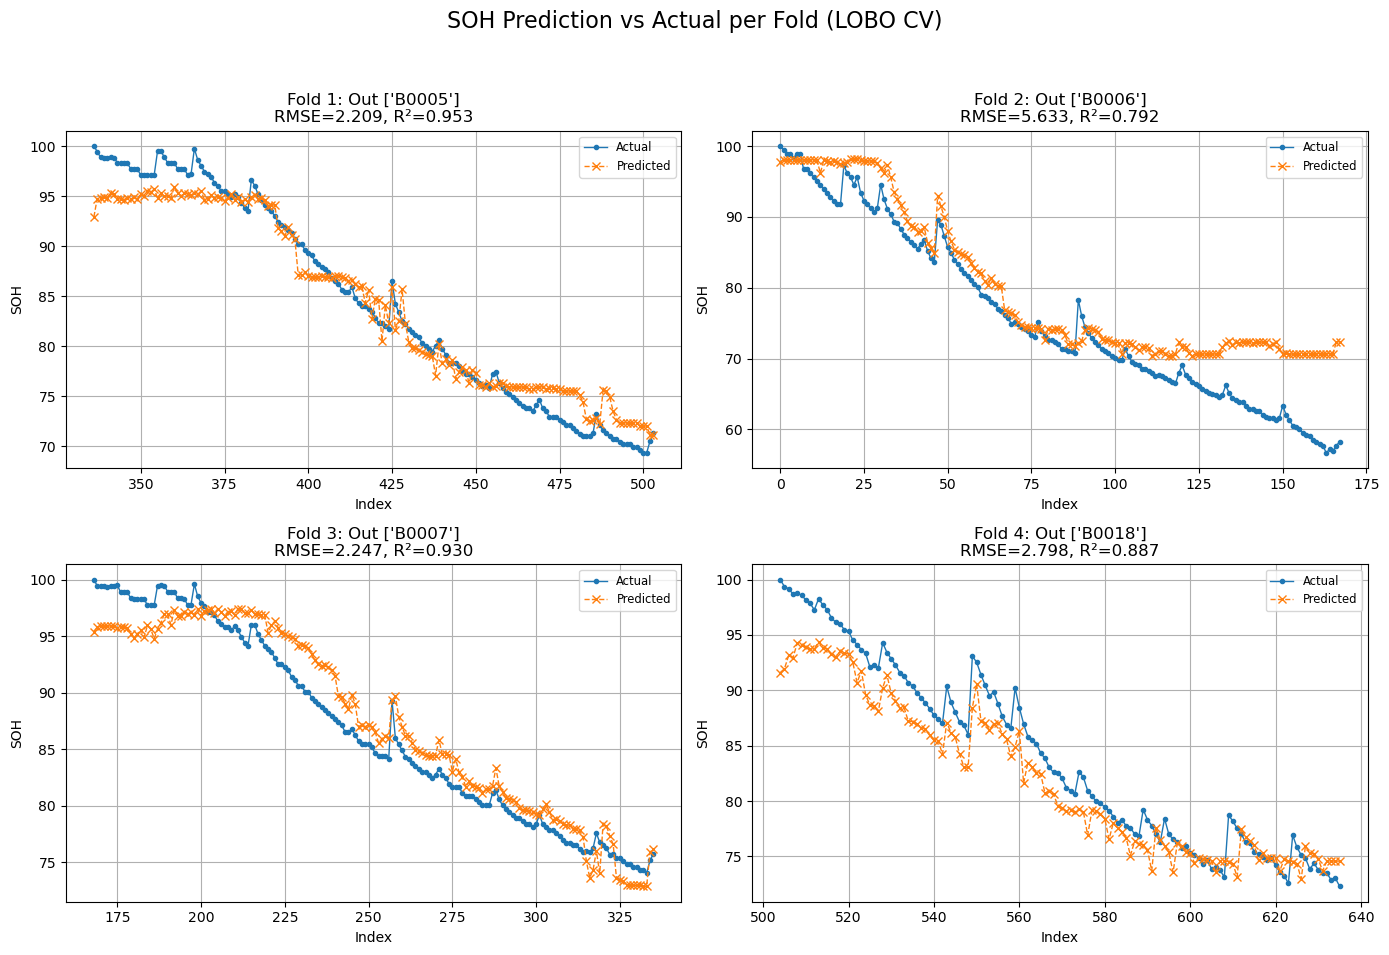


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.8905 +/- 0.0617 
  Mean MAE: 2.6146 +/- 1.0038 (%)
  Mean RMSE: 3.2216 +/- 1.4113 (%)

SOH CV Predictions Head (from run with plotting):
       Actual  Predicted  Group  Fold  Index
0  100.000000  97.763013  B0006     2      0
1   99.498985  98.092714  B0006     2      1
2   98.918547  98.099900  B0006     2      2
3   98.916498  98.072827  B0006     2      3
4   98.289755  98.085171  B0006     2      4

Initializing CrossValidator for RUL...
CrossValidator initialized for target 'RUL' using LOBO (4 splits).
Model to evaluate: RandomForest

--- Running LOBO CV for target 'RUL' (Plot each fold: True) ---


LOBO Folds:  25%|██▌       | 1/4 [00:00<00:00,  8.43it/s]


Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...


LOBO Folds:  75%|███████▌  | 3/4 [00:00<00:00,  8.88it/s]


Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...

Training RandomForest model...
RandomForest model training complete.
Predicting with trained RandomForest model...


LOBO Folds: 100%|██████████| 4/4 [00:00<00:00,  8.82it/s]


LOBO Cross-validation loop finished.


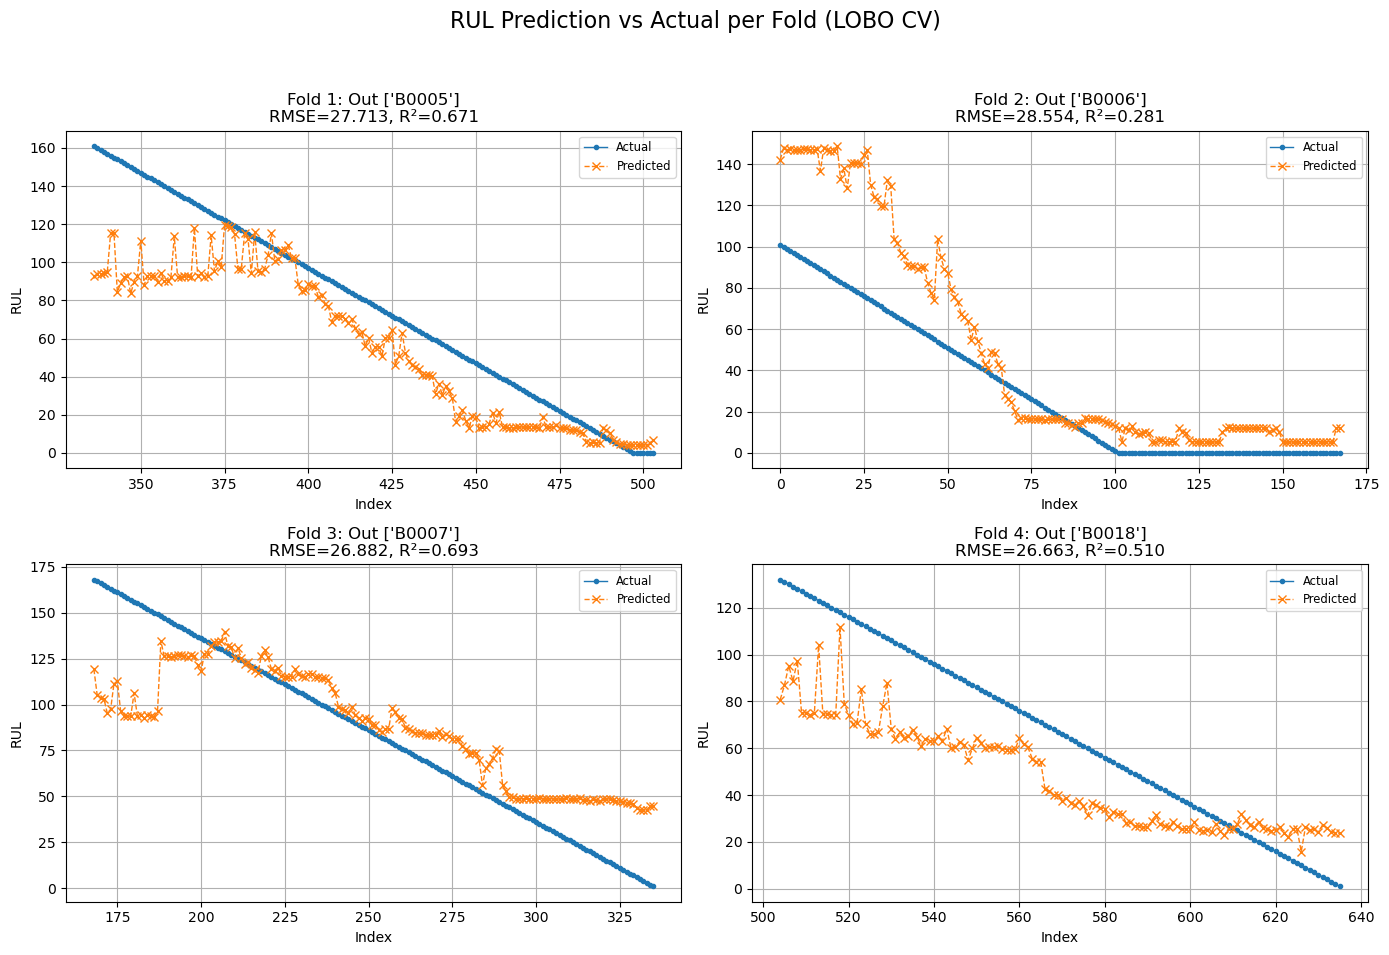


--- Cross-Validation Metrics Summary ---
  Mean R2: 0.5388 +/- 0.1644 
  Mean MAE: 21.5283 +/- 1.1617 (cycles)
  Mean RMSE: 27.4531 +/- 0.7465 (cycles)

RUL CV Predictions Head (from run with plotting):
   Actual   Predicted  Group  Fold  Index
0     101  142.111630  B0006     2      0
1     100  147.694520  B0006     2      1
2      99  146.943488  B0006     2      2
3      98  147.458771  B0006     2      3
4      97  146.940728  B0006     2      4


In [5]:
if __name__ == '__main__':
    # --- Giả sử đã có các lớp và dữ liệu từ các bước trước ---
    # df_selected_all: DataFrame từ FeatureSelector (features + targets + group + cycle)
    # final_feature_list: Danh sách tên feature đã chọn
    # ModelEvaluator, ModelTrainer đã định nghĩa

    print("\n--- Example Usage of CrossValidator with Per-Fold Plots ---")
    try:
        if 'df_selected_all' not in locals() or df_selected_all is None:
             raise ValueError("Input DataFrame 'df_selected_all' is missing.")
        if 'final_feature_list' not in locals() or not final_feature_list:
             raise ValueError("Feature list 'final_feature_list' is missing or empty.")
        if 'cycle' not in df_selected_all.columns:
            print("Warning: 'cycle' column missing in df_selected_all. Plots will use index.")
            time_col_to_use = None # Sẽ dùng index thay thế
        else:
            time_col_to_use = 'cycle' # Dùng cột cycle để vẽ

        # 1. Khởi tạo Evaluator và Trainer
        evaluator_cv_plot = ModelEvaluator(metrics_to_calculate=['mae', 'rmse', 'r2'])
        trainer_cv_plot = ModelTrainer(
            model_type='RandomForest',
            model_params={'n_estimators': 100, 'max_depth': 5, 'random_state': 42, 'n_jobs': -1}
        )

        # 2. Khởi tạo CrossValidator cho SOH
        print("\nInitializing CrossValidator for SOH...")
        cv_soh_plot = CrossValidator(
            data=df_selected_all,
            feature_cols=final_feature_list,
            target_col='SOH',
            group_col='battery_id',
            model_trainer=trainer_cv_plot,
            evaluator=evaluator_cv_plot,
            cv_strategy='LOBO',
            time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
        )

        # 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
        cv_soh_plot.run(plot_each_fold=True) # Đặt thành True

        # 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
        soh_metrics_summary_plot = cv_soh_plot.get_metrics_summary()

        # 5. Lấy dự đoán SOH từ CV (tùy chọn, dùng để vẽ đồ thị tổng hợp nếu muốn)
        soh_cv_predictions_plot = cv_soh_plot.get_predictions()
        if soh_cv_predictions_plot is not None:
            print("\nSOH CV Predictions Head (from run with plotting):")
            print(soh_cv_predictions_plot.head())


        # ----- Có thể lặp lại cho RUL nếu muốn -----
        print("\nInitializing CrossValidator for RUL...")
        cv_rul_plot = CrossValidator(
            data=df_selected_all,
            feature_cols=final_feature_list,
            target_col='RUL',
            group_col='battery_id',
            model_trainer=trainer_cv_plot,
            evaluator=evaluator_cv_plot,
            cv_strategy='LOBO',
            time_col=time_col_to_use # Truyền tên cột cycle (hoặc None)
        )

        # 3. Chạy Cross-Validation và YÊU CẦU VẼ ĐỒ THỊ TỪNG FOLD
        cv_rul_plot.run(plot_each_fold=True) # Đặt thành True

        # 4. Lấy và hiển thị kết quả metrics SOH (đã được in trong get_metrics_summary)
        soh_metrics_summary_plot = cv_rul_plot.get_metrics_summary()

        # 5. Lấy dự đoán SOH từ CV (tùy chọn, dùng để vẽ đồ thị tổng hợp nếu muốn)
        rul_cv_predictions_plot = cv_rul_plot.get_predictions()
        if soh_cv_predictions_plot is not None:
            print("\nRUL CV Predictions Head (from run with plotting):")
            print(rul_cv_predictions_plot.head())

    except Exception as e:
        print(f"\nAn error occurred during CrossValidator example: {e}")

In [6]:
soh_cv_predictions_plot.shape

(636, 5)

In [7]:
soh_cv_predictions_plot.head()

,Actual,Predicted,Group,Fold,Index
0,100.000000,97.763013,B0006,2,0
1,99.498985,98.092714,B0006,2,1
2,98.918547,98.099900,B0006,2,2
3,98.916498,98.072827,B0006,2,3
4,98.289755,98.085171,B0006,2,4


In [8]:
soh_cv_predictions_plot.to_csv('predict_test.csv')